# Lidando com dados de muitas dimensões
---

In [1]:
import pandas as pd

In [2]:
url_dados = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'

In [3]:
dados = pd.read_csv(url_dados)
dados.shape

(569, 35)

In [4]:
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


## Separação dos dados de treino e teste
---

In [5]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = dados.drop(columns=['id', 'diagnostico'])
valores_exames = valores_exames.drop(columns=['exame_33'])
diagnostico = dados.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, train_size=0.3)

## Tratando os valores nulos
---

In [6]:
valores_exames.isnull().sum()

exame_1     0
exame_2     0
exame_3     0
exame_4     0
exame_5     0
exame_6     0
exame_7     0
exame_8     0
exame_9     0
exame_10    0
exame_11    0
exame_12    0
exame_13    0
exame_14    0
exame_15    0
exame_16    0
exame_17    0
exame_18    0
exame_19    0
exame_20    0
exame_21    0
exame_22    0
exame_23    0
exame_24    0
exame_25    0
exame_26    0
exame_27    0
exame_28    0
exame_29    0
exame_30    0
exame_31    0
exame_32    0
dtype: int64

## Criando o modelo Random Forest
---

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
"{:.2%}".format(classificador.score(teste_x, teste_y))

'93.73%'

## Classificar Dummy
---

In [14]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(treino_x, treino_y)
"{:.2%}".format(dummy.score(teste_x, teste_y))

'63.91%'

## Análise Exploratória e Padrozinando os dados
--- 


In [26]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis=1)
    dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

    plt.figure(figsize=(10, 10))
    sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot, split=True)

    plt.xticks(rotation=90)

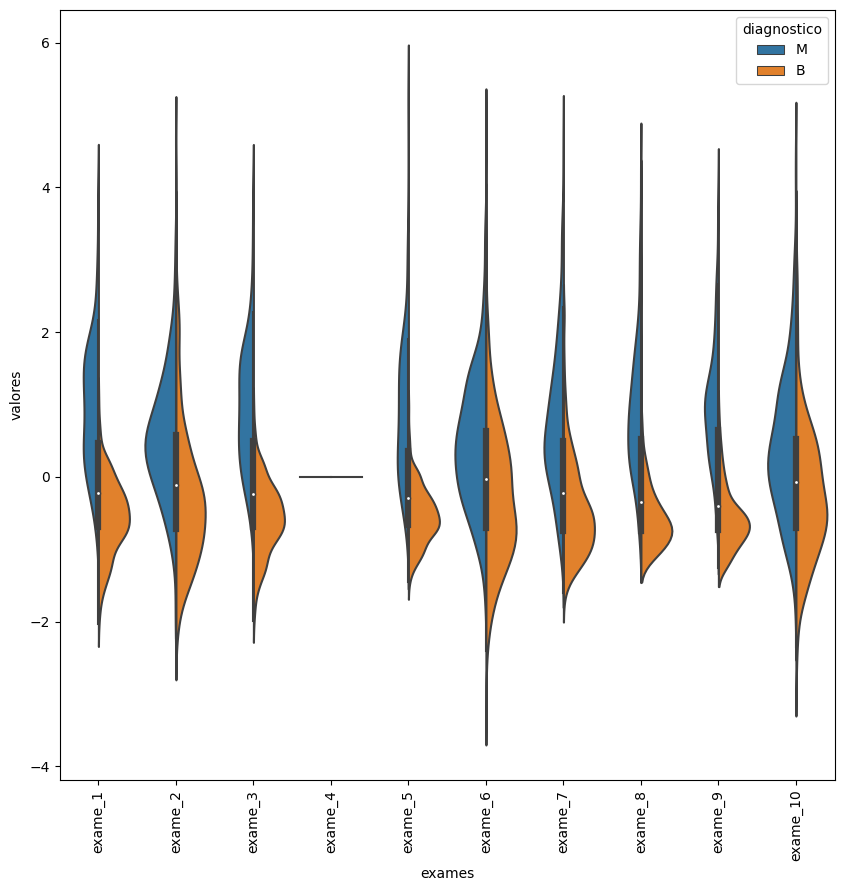

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_exames_padronizados = padronizador.transform(valores_exames)
valores_exames_padronizados = pd.DataFrame(valores_exames_padronizados, columns=valores_exames.keys())

grafico_violino(valores_exames_padronizados, 0, 10)

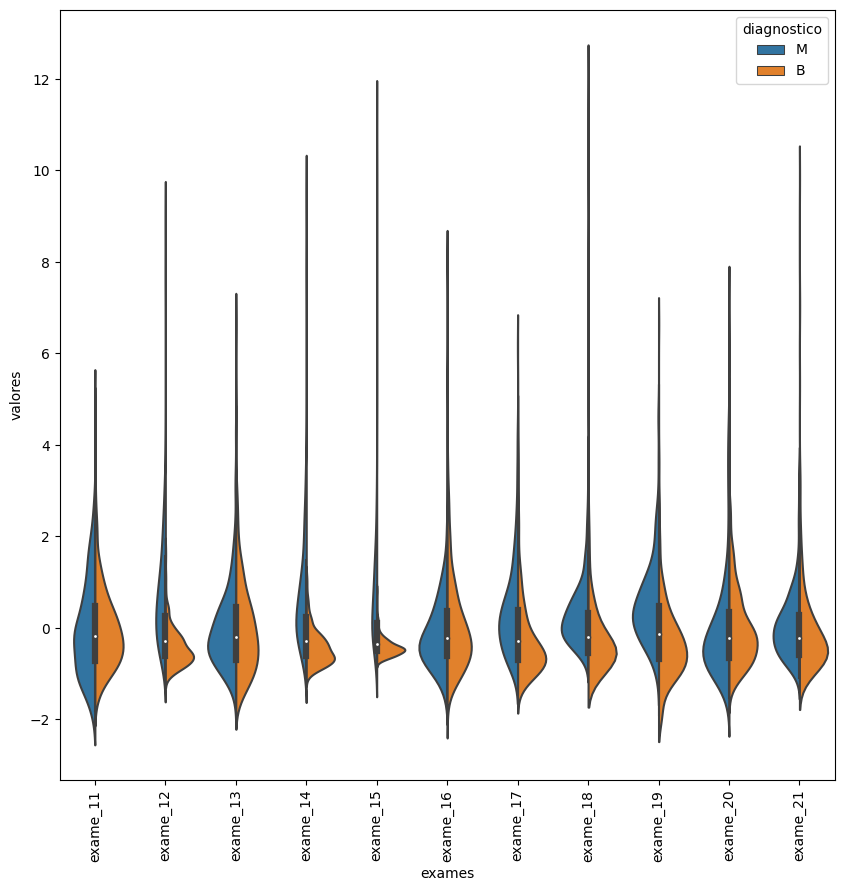

In [28]:
grafico_violino(valores_exames_padronizados, 10, 21)

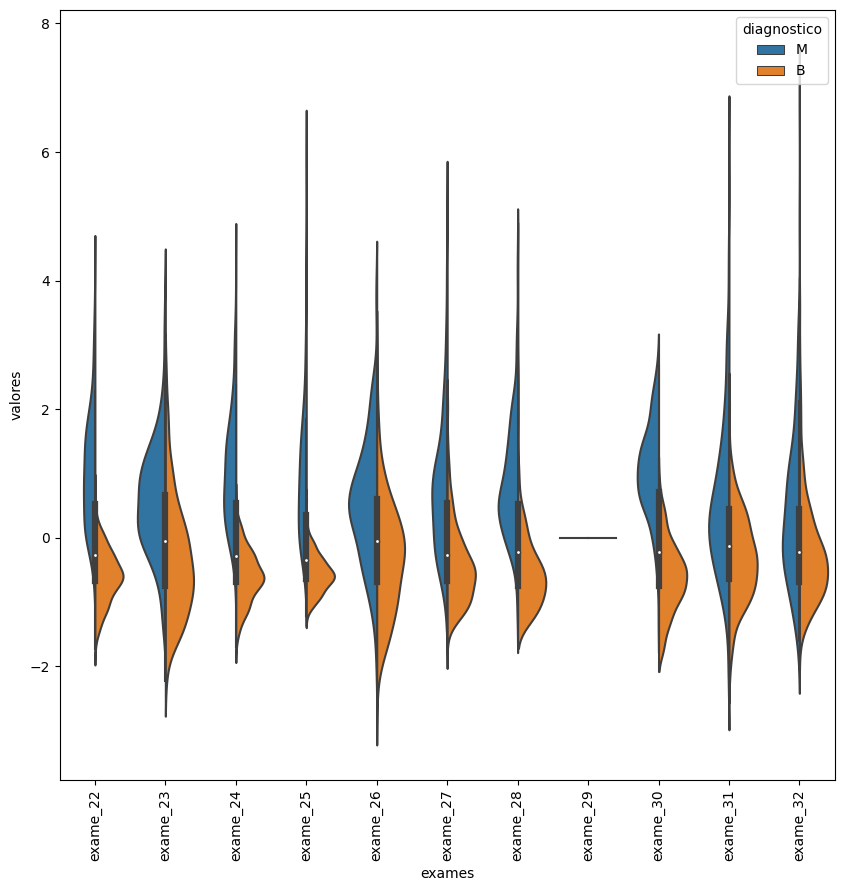

In [29]:
grafico_violino(valores_exames_padronizados, 21, 32)